In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np


In [105]:
df = pd.read_csv(r"../data/final/panel_final_combined_data_nolables.csv")

df.insert(0, 'status_inf', df.pop('status_inf'))

df = df.drop(columns=['conglome_t1', 'vivienda_t1','hogar_t1','codperso_t1','periodo','ocupinf_t1','ocupinf_t2','linea_t1'])

# Calcular el tiempo total de trabajo en terminos anuales
# Crear la nueva columna 'p513_calculada_t1' que combine años y meses
df['p513_calculada_t1'] = df['p513a1_t1'] + df['p513a2_t1'] / 12
df = df.drop(columns=['p513a1_t1', 'p513a2_t1'])

df

,status_inf,p207_t1,p208a_t1,p209_t1,p501_t1,p507_t1,p510_t1,p510a1_t1,p510b_t1,p511a_t1,...,ingexthd_t1,ingtrahd_t1,ingtexhd_t1,ingrenhd_t1,ingmo1hd_t1,inghog1d_t1,gashog1d_t1,pobreza_t1,estrsocial_t1,p513_calculada_t1
0,0,2,47,2,1,3,2.0,NaN,NaN,1.0,...,1209,0,0,0,59973.00,67037.000000,32513.843561,3,4.0,12.000000
1,1,1,57,1,1,2,NaN,2.0,1.0,NaN,...,0,0,0,0,37827.00,39858.443405,18009.005738,3,4.0,38.000000
2,0,1,29,6,1,3,2.0,NaN,NaN,1.0,...,3270,0,0,0,53946.00,59025.000000,31041.503760,3,4.0,4.250000
3,0,1,26,6,1,3,2.0,1.0,1.0,2.0,...,3270,0,0,0,53946.00,59025.000000,31041.503760,3,4.0,0.416667
4,0,1,67,2,1,2,NaN,2.0,2.0,NaN,...,0,420,0,8328,32102.00,44854.000000,28348.531784,3,5.0,40.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20036,1,1,61,2,1,2,NaN,2.0,2.0,NaN,...,0,0,0,26436,84921.00,99977.875000,44964.398438,3,3.0,17.000000
20037,0,1,56,2,1,4,6.0,1.0,1.0,1.0,...,28116,7811,0,0,188623.75,209964.750000,71848.789062,3,3.0,30.000000
20038,0,1,29,6,1,3,2.0,NaN,NaN,2.0,...,28116,7811,0,0,188623.75,209964.750000,71848.789062,3,3.0,2.000000
20039,0,1,31,2,1,4,5.0,1.0,1.0,2.0,...,0,1210,0,0,20262.00,25123.931641,13151.727539,3,6.0,0.250000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20041 entries, 0 to 20040
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status_inf         20041 non-null  int64  
 1   p207_t1            20041 non-null  int64  
 2   p208a_t1           20041 non-null  int64  
 3   p209_t1            20041 non-null  int64  
 4   p501_t1            20041 non-null  int64  
 5   p507_t1            20041 non-null  int64  
 6   p510_t1            15215 non-null  float64
 7   p510a1_t1          12829 non-null  float64
 8   p510b_t1           12829 non-null  float64
 9   p511a_t1           14849 non-null  float64
 10  p512a_t1           19593 non-null  float64
 11  p513t_t1           20041 non-null  int64  
 12  p514_t1            20041 non-null  int64  
 13  p519_t1            20041 non-null  int64  
 14  p520_t1            2744 non-null   float64
 15  p521a_t1           2250 non-null   float64
 16  p521c_t1           193

In [170]:
df['status_inf'].value_counts()

status_inf
0    16592
1     3449
Name: count, dtype: int64

## Filtro pct nulos

In [107]:
null_percent = df.isnull().mean()*100
cols_null = null_percent[null_percent > 80 ].index
cols_validas = null_percent[null_percent <= 80 ].index

print(cols_null)


Index(['p520_t1', 'p521a_t1', 'p302_t1', 'p307_t1', 'p313_t1', 'p105b_t1'], dtype='object')


In [108]:
##Quitar variables
df_null = df[cols_validas].copy()

In [109]:
df_null.shape[1]

73

In [110]:
df_num = df_null.drop(columns = ['status_inf'])

In [111]:
varianzas = df_num.var()
umbral = 0.01
vars_seleccionadas = varianzas[varianzas > umbral].index
vars_no_seleccionadas = varianzas[varianzas <= umbral].index

print(df[vars_no_seleccionadas].nunique())
print(df[vars_no_seleccionadas].value_counts())

p524a2_t1    2
p4196_t1     2
p4197_t1     1
p4198_t1     2
p107b1_t1    2
dtype: int64
p524a2_t1  p4196_t1  p4197_t1  p4198_t1  p107b1_t1
0.0        2         2         2         2            15000
1.0        2         2         2         2              127
0.0        2         2         1         2               77
                               2         1               67
           1         2         2         2                5
1.0        2         2         1         2                4
                               2         1                1
Name: count, dtype: int64


In [112]:
df_num = df_num[vars_seleccionadas]

In [113]:
df_num.shape[1]

67

In [114]:
umbral = 0.6

df_encoded_vals = df_num.to_numpy(dtype = float)
corr_matrix = np.corrcoef(df_encoded_vals, rowvar = False)
corr_matrix = np.abs(corr_matrix)

corr_df = pd.DataFrame(corr_matrix, index = df_num.columns, columns = df_num.columns)
upper = np.triu(np.ones(corr_df.shape), k=1).astype(bool)
to_drop = [col for col in corr_df.columns if (corr_df.loc[:, col][upper[:, corr_df.columns.get_loc(col)]] > umbral).any()]
df_corrs = df_num.drop(columns = to_drop).copy()

In [115]:
print('El tamano de la base uego de aplicar correlaci[on con umbral 60%:',df_corrs.shape)
print('Datos finales',df_corrs.info())
print('Las columnas descartadas son:', to_drop)

El tamano de la base uego de aplicar correlaci[on con umbral 60%: (20041, 62)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20041 entries, 0 to 20040
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   p207_t1            20041 non-null  int64  
 1   p208a_t1           20041 non-null  int64  
 2   p209_t1            20041 non-null  int64  
 3   p501_t1            20041 non-null  int64  
 4   p507_t1            20041 non-null  int64  
 5   p510_t1            15215 non-null  float64
 6   p510a1_t1          12829 non-null  float64
 7   p510b_t1           12829 non-null  float64
 8   p511a_t1           14849 non-null  float64
 9   p512a_t1           19593 non-null  float64
 10  p513t_t1           20041 non-null  int64  
 11  p514_t1            20041 non-null  int64  
 12  p519_t1            20041 non-null  int64  
 13  p521c_t1           19358 non-null  float64
 14  p524a1_t1          15149 non-null  float

In [116]:
df_corrs.head()

,p207_t1,p208a_t1,p209_t1,p501_t1,p507_t1,p510_t1,p510a1_t1,p510b_t1,p511a_t1,p512a_t1,...,ingindhd_t1,insedthd_t1,ingseihd_t1,ingexthd_t1,ingtrahd_t1,ingtexhd_t1,ingrenhd_t1,pobreza_t1,estrsocial_t1,p513_calculada_t1
0,2,47,2,1,3,2.0,NaN,NaN,1.0,5.0,...,44482.0,0.0,0.0,1209,0,0,0,3,4.0,12.000000
1,1,57,1,1,2,NaN,2.0,1.0,NaN,1.0,...,28505.0,0.0,0.0,0,0,0,0,3,4.0,38.000000
2,1,29,6,1,3,2.0,NaN,NaN,1.0,5.0,...,8683.0,0.0,0.0,3270,0,0,0,3,4.0,4.250000
3,1,26,6,1,3,2.0,1.0,1.0,2.0,5.0,...,8683.0,0.0,0.0,3270,0,0,0,3,4.0,0.416667
4,1,67,2,1,2,NaN,2.0,2.0,NaN,1.0,...,23354.0,0.0,0.0,0,420,0,8328,3,5.0,40.000000


In [133]:
# Lista de variables categóricas
categorical_columns_t1 = [
    'p207_t1', 'p209_t1', 'p501_t1', 'p507_t1', 'p510_t1', 'p510a1_t1', 'p510b_t1', 'p511a_t1', 'p512a_t1',
    'p514_t1', 'p519_t1', 'p521a_t1', 'p521c_t1', 'p524a2_t1', 'p528_t1', 'p530b_t1', 'p535_t1', 'p558c_t1',
    'p558d_t1', 'p300a_t1', 'p301a_t1', 'p302_t1', 'p307_t1', 'p313_t1', 'p314a_t1', 'p401f_t1', 'p401_t1',
    'p4021_t1', 'p4022_t1', 'p4023_t1', 'p4024_t1', 'p4025_t1', 'p4191_t1', 'p4192_t1', 'p4193_t1', 'p4194_t1',
    'p4195_t1', 'p4196_t1', 'p4197_t1', 'p4198_t1', 'p101_t1', 'p102_t1', 'p103_t1', 'p103a_t1', 'p104_t1',
    'p104a_t1', 'p105a_t1', 'p106b_t1', 'p107b1_t1', 'p110_t1', 'p110a1_t1', 'p111a_t1', 'p112a_t1', 'p1142_t1',
    'p1144_t1', 'estrsocial_t1', 'pobreza_t1'
]

vals_excluidas = list(cols_null) + list(vars_no_seleccionadas) + list(to_drop)
categorical_columns_t1_2 = [col for col in categorical_columns_t1 if col not in vals_excluidas ]
# Filtrar el DataFrame para solo las variables categóricas
df_categoricas = df_corrs[categorical_columns_t1_2]
df_sin_categoricas = df_corrs.drop(columns=categorical_columns_t1_2)


In [134]:
# Paso 1: One-hot encoding para variables categóricas
df_encoded = pd.get_dummies(df_categoricas, columns=categorical_columns_t1_2, dummy_na=True)

In [137]:
cols_bool = [col for col in df_encoded.columns if df_encoded[col].dtype == 'bool']
df_encoded[cols_bool] = df_encoded[cols_bool].fillna(False).astype('Int64')
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20041 entries, 0 to 20040
Columns: 256 entries, p207_t1_1.0 to pobreza_t1_nan
dtypes: Int64(256)
memory usage: 44.0 MB


In [157]:
vars_finales = df_corrs.columns.to_list()
vars_finales_2 = ["status_inf"] + vars_finales

In [143]:
df.head()

,status_inf,p207_t1,p208a_t1,p209_t1,p501_t1,p507_t1,p510_t1,p510a1_t1,p510b_t1,p511a_t1,...,ingexthd_t1,ingtrahd_t1,ingtexhd_t1,ingrenhd_t1,ingmo1hd_t1,inghog1d_t1,gashog1d_t1,pobreza_t1,estrsocial_t1,p513_calculada_t1
0,0,2,47,2,1,3,2.0,NaN,NaN,1.0,...,1209,0,0,0,59973.0,67037.000000,32513.843561,3,4.0,12.000000
1,1,1,57,1,1,2,NaN,2.0,1.0,NaN,...,0,0,0,0,37827.0,39858.443405,18009.005738,3,4.0,38.000000
2,0,1,29,6,1,3,2.0,NaN,NaN,1.0,...,3270,0,0,0,53946.0,59025.000000,31041.503760,3,4.0,4.250000
3,0,1,26,6,1,3,2.0,1.0,1.0,2.0,...,3270,0,0,0,53946.0,59025.000000,31041.503760,3,4.0,0.416667
4,0,1,67,2,1,2,NaN,2.0,2.0,NaN,...,0,420,0,8328,32102.0,44854.000000,28348.531784,3,5.0,40.000000


In [158]:
df_model = df[vars_finales_2]

In [159]:
df_model.head()

,status_inf,p207_t1,p208a_t1,p209_t1,p501_t1,p507_t1,p510_t1,p510a1_t1,p510b_t1,p511a_t1,...,ingindhd_t1,insedthd_t1,ingseihd_t1,ingexthd_t1,ingtrahd_t1,ingtexhd_t1,ingrenhd_t1,pobreza_t1,estrsocial_t1,p513_calculada_t1
0,0,2,47,2,1,3,2.0,NaN,NaN,1.0,...,44482.0,0.0,0.0,1209,0,0,0,3,4.0,12.000000
1,1,1,57,1,1,2,NaN,2.0,1.0,NaN,...,28505.0,0.0,0.0,0,0,0,0,3,4.0,38.000000
2,0,1,29,6,1,3,2.0,NaN,NaN,1.0,...,8683.0,0.0,0.0,3270,0,0,0,3,4.0,4.250000
3,0,1,26,6,1,3,2.0,1.0,1.0,2.0,...,8683.0,0.0,0.0,3270,0,0,0,3,4.0,0.416667
4,0,1,67,2,1,2,NaN,2.0,2.0,NaN,...,23354.0,0.0,0.0,0,420,0,8328,3,5.0,40.000000


In [161]:
X = df_model.drop(columns=['status_inf'])
y = df_model['status_inf']


In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [163]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(scale_pos_weight)

4.8108010148604565


In [166]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                      scale_pos_weight = scale_pos_weight)
model.fit(X_train, y_train)



c:\Users\sergio.cuadros\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:54:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


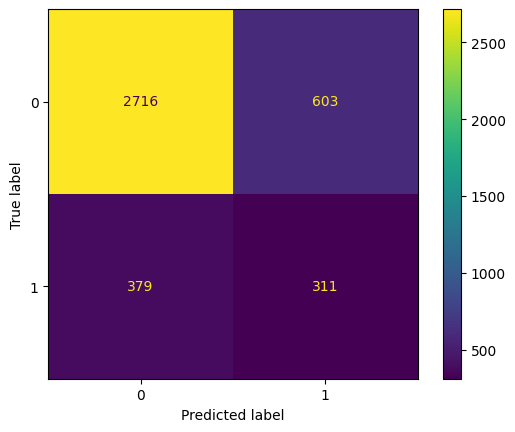

In [167]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

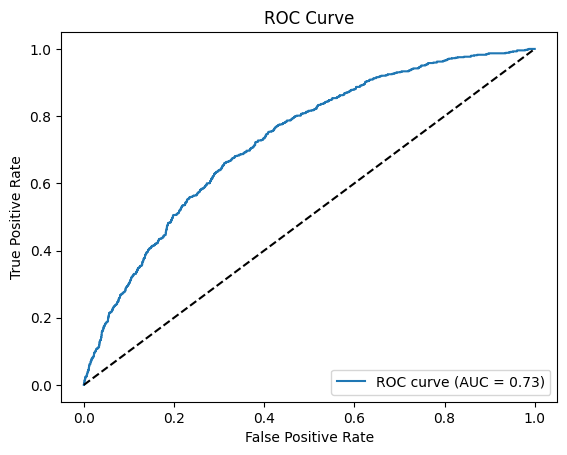

In [168]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

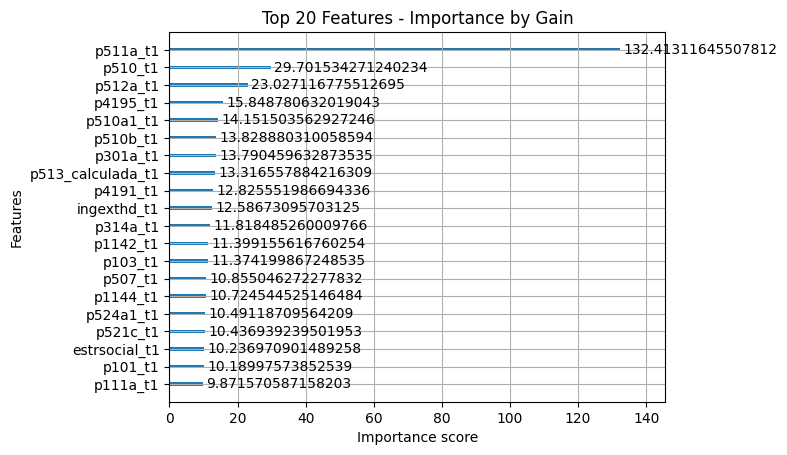

In [169]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Usamos el modelo ya entrenado
plot_importance(model, max_num_features=20, importance_type='gain')
plt.title("Top 20 Features - Importance by Gain")
plt.show()